# Parte 1 - Preguntas de Selección multiple

### 1. a) 

### 2. b) 

### 3. c)

### 4. b)

### 5. a)

### 6. c)

### 7. b)

### 8. a)

### 9. b)

### 10. b)

# Parte 2
## Opcion A: Navegacion de Agente en Rejilla (Grid World)



In [99]:
# Paso 1: Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import heapq

In [100]:
# Paso 2: Definir los parámetros del grid
GRID_SIZE = 10  # Grid de 10x10 (de 0,0 a 9,9)
INICIO = (0, 0)
META = (9, 9)
OBSTACULOS = [(2, 2), (2, 3), (2, 4), (5, 5), (5, 6), (6, 5), (7, 5)]

print(f"Tamaño del grid: {GRID_SIZE}x{GRID_SIZE}")
print(f"Inicio: {INICIO}")
print(f"Meta: {META}")
print(f"Obstáculos: {OBSTACULOS}")

Tamaño del grid: 10x10
Inicio: (0, 0)
Meta: (9, 9)
Obstáculos: [(2, 2), (2, 3), (2, 4), (5, 5), (5, 6), (6, 5), (7, 5)]


Grid creado exitosamente
Grid shape: (10, 10)
Número de obstáculos: 7


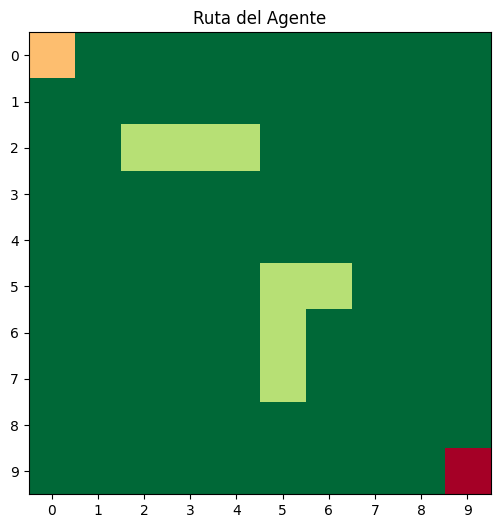

In [101]:
class Grid:
    def __init__(self, size, obstaculos):
        self.size = size
        self.obstaculos = set(obstaculos)
        
        self.grid = np.zeros((size, size))
        for obs in obstaculos:
            x, y = obs
            self.grid[x, y] = 1
    
    def es_valido(self, pos):
        x, y = pos
        return (0 <= x < self.size and 
                0 <= y < self.size and 
                pos not in self.obstaculos)
    
    def obtener_vecinos(self, pos):
        x, y = pos
        movimientos = [
            (x - 1, y),  # Arriba
            (x + 1, y),  # Abajo
            (x, y - 1),  # Izquierda
            (x, y + 1)   # Derecha
        ]
        
        # Filtrar solo movimientos válidos
        vecinos = []
        for mov in movimientos:  # Para cada movimiento
            if self.es_valido(mov):  # Si el movimiento es válido
                vecinos.append(mov)  # Agrégalo a la lista
        
        return vecinos
    
    def mostrar_grid(self, path=None):
        # Crear matriz visual
        visual = np.copy(self.grid)
        
        # Marcar camino
        if path:
            for pos in path:
                if pos != INICIO and pos != META:
                    visual[pos] = 0.5
        
        # Marcar inicio y meta
        visual[INICIO] = 2
        visual[META] = 3
        
        # Graficar
        plt.figure(figsize=(6, 6))
        plt.imshow(visual, cmap='RdYlGn_r')
        plt.xticks(range(self.size))
        plt.yticks(range(self.size))
        plt.title('Ruta del Agente')
        plt.show()

# Crear el grid
grid = Grid(GRID_SIZE, OBSTACULOS)
print("Grid creado exitosamente")
print(f"Grid shape: {grid.grid.shape}")
print(f"Número de obstáculos: {len(grid.obstaculos)}")
grid.mostrar_grid()

In [102]:
class Agent:
    def __init__(self, grid, inicio, meta):
        self.grid = grid
        self.inicio = inicio
        self.meta = meta
        
    # Implementación de BFS
    def bfs(self):
        queue = deque([self.inicio])
        visited = set([self.inicio])
        parent = {self.inicio: None}
        
        # BFS Loop
        while queue:
            current = queue.popleft()
            
            if current == self.meta:
                return self.reconstruir_camino(parent)
            
            for vecino in self.grid.obtener_vecinos(current):
                if vecino not in visited:
                    visited.add(vecino)
                    parent[vecino] = current
                    queue.append(vecino)
        
        # No se encontró camino
        return None  
    
    # Reconstruir el camino desde el nodo meta hasta el inicio
    def reconstruir_camino(self, parent):
        path = []
        current = self.meta
        while current is not None:
            path.append(current)
            current = parent[current]
        path.reverse()
        return path
    


BÚSQUEDA BFS: Encontrando ruta de (0,0) a (9,9)
Camino encontrado: 
   Paso 0: (0, 0)
   Paso 1: (1, 0)
   Paso 2: (2, 0)
   Paso 3: (3, 0)
   Paso 4: (4, 0)
   Paso 5: (5, 0)
   Paso 6: (6, 0)
   Paso 7: (7, 0)
   Paso 8: (8, 0)
   Paso 9: (9, 0)
   Paso 10: (9, 1)
   Paso 11: (9, 2)
   Paso 12: (9, 3)
   Paso 13: (9, 4)
   Paso 14: (9, 5)
   Paso 15: (9, 6)
   Paso 16: (9, 7)
   Paso 17: (9, 8)
   Paso 18: (9, 9)
Resultados: 
   Inicio: (0, 0)
   Meta: (9, 9)
   Costo total (pasos): 18
Ruta en el grid: 


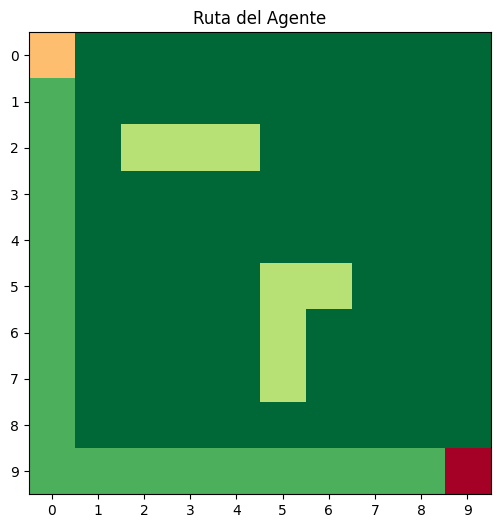

In [103]:
# Paso 5: Ejecutar BFS y mostrar resultados
print("BÚSQUEDA BFS: Encontrando ruta de (0,0) a (9,9)")

# Crear el agente
agente = Agent(grid, INICIO, META)

# Ejecutar BFS
ruta = agente.bfs()

# Mostrar resultados
if ruta:
    print("Camino encontrado: ")
    for i, pos in enumerate(ruta):
        print(f"   Paso {i}: {pos}")
    
    print("Resultados: ")
    print(f"   Inicio: {INICIO}")
    print(f"   Meta: {META}")
    print(f"   Costo total (pasos): {len(ruta) - 1}")
    
    # Visualizar el grid con la ruta
    print("Ruta en el grid: ")
    grid.mostrar_grid(ruta)
else:
    print("No se encontró ruta entre el inicio y la meta.")